In [1]:
import pandas as pd

df = pd.read_csv('housing.data.txt', sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


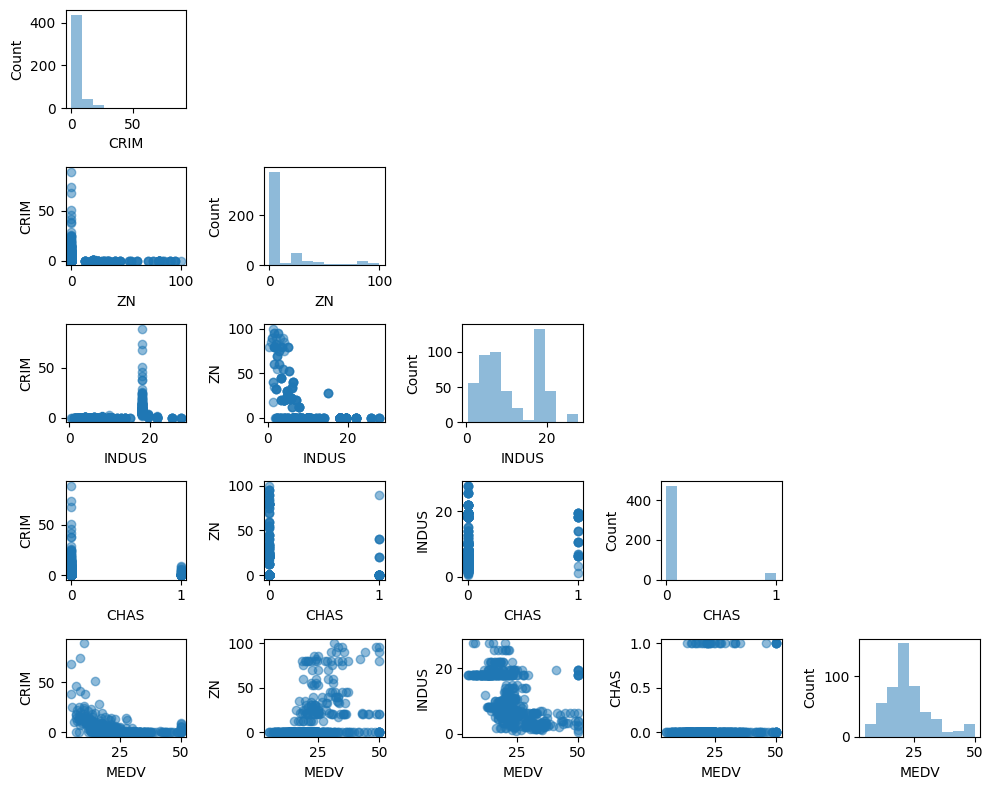

In [2]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['CRIM','ZN','INDUS','CHAS','MEDV']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

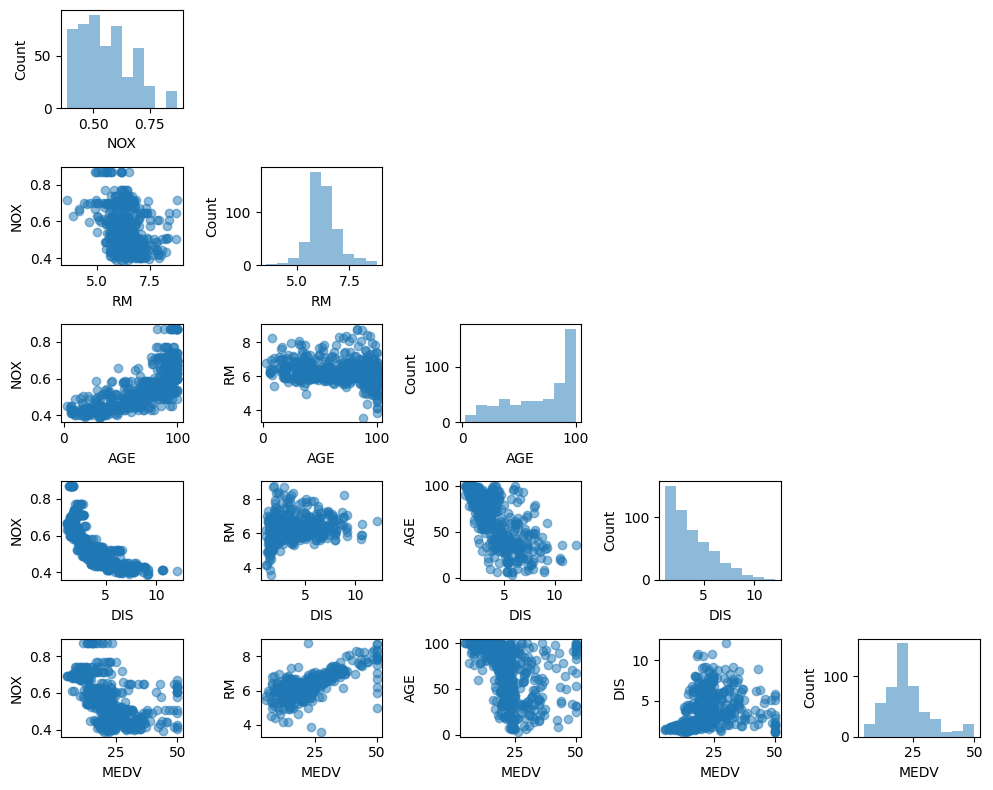

In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['NOX','RM','AGE','DIS','MEDV']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

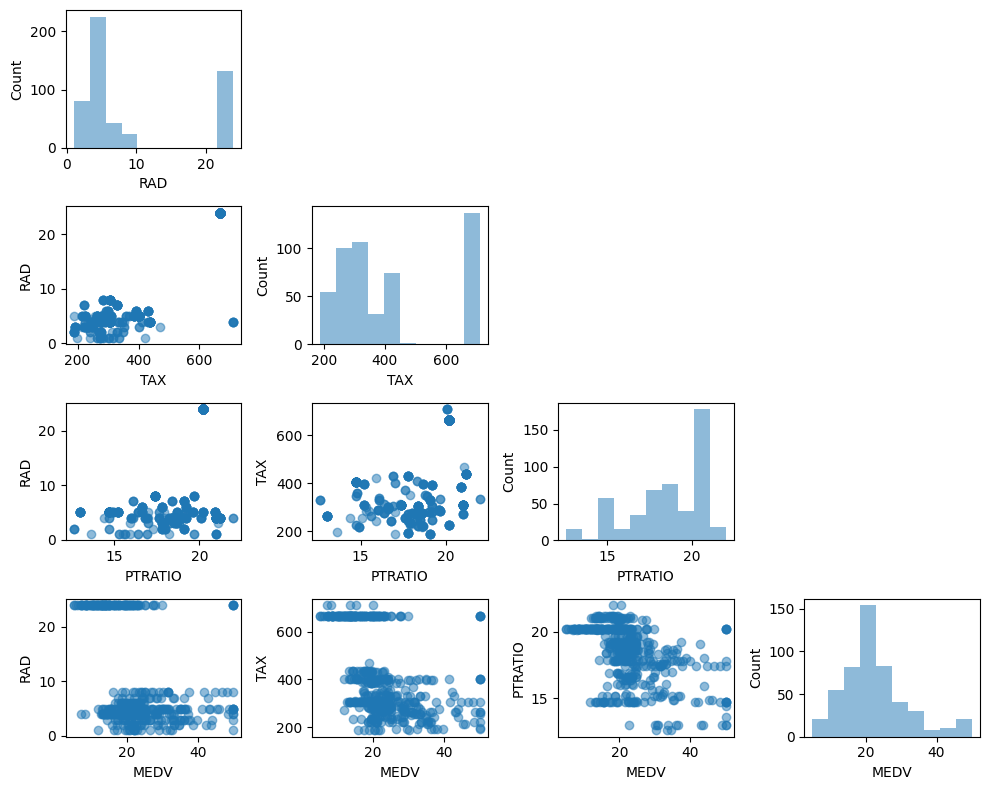

In [4]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['RAD','TAX','PTRATIO','MEDV']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

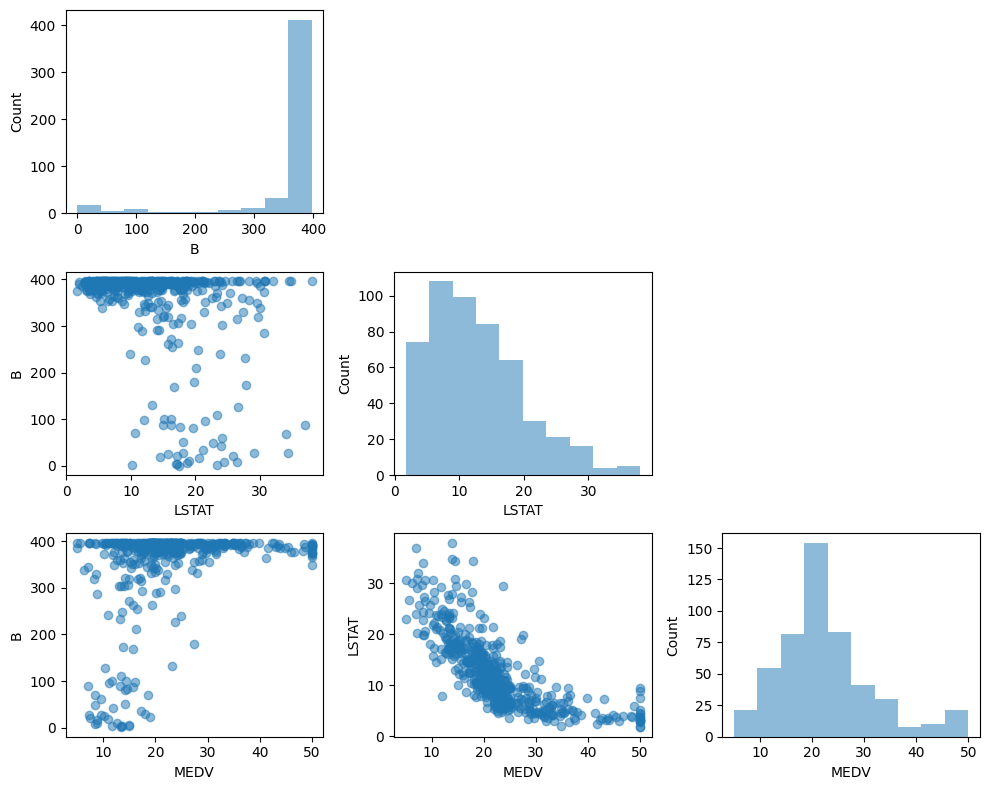

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['B','LSTAT','MEDV']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

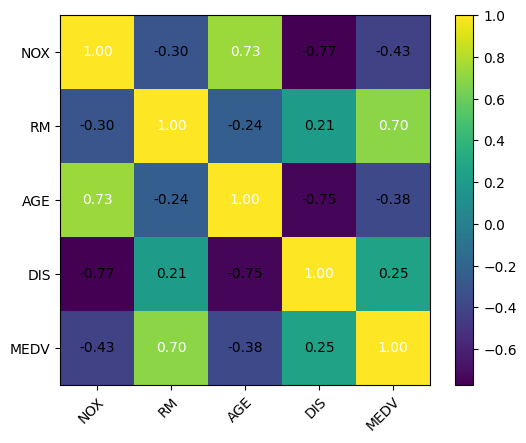

In [6]:
from mlxtend.plotting import heatmap
import numpy as np
cols = ['NOX','RM','AGE','DIS','MEDV']
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,row_names=cols,column_names=cols)
plt.show()

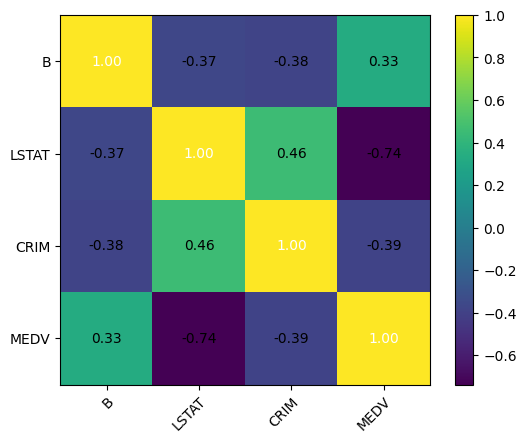

In [7]:
from mlxtend.plotting import heatmap
import numpy as np
cols = ['B','LSTAT','CRIM','MEDV']
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,row_names=cols,column_names=cols)
plt.show()

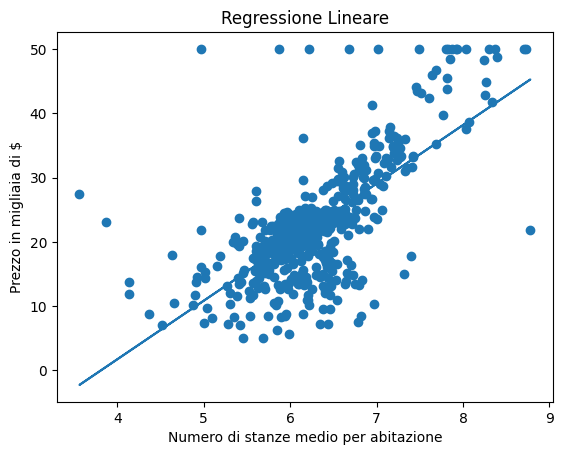

In [8]:
def lin_regplot(X,y,model):
    plt.scatter(X,y)
    plt.plot(X,model.predict(X))
    return None
    
X=df[['RM']].values
y=df['MEDV'].values

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)
lin_regplot(X,y,slr)
plt.xlabel('Numero di stanze medio per abitazione')
plt.ylabel('Prezzo in migliaia di $')
plt.title('Regressione Lineare')
plt.show()




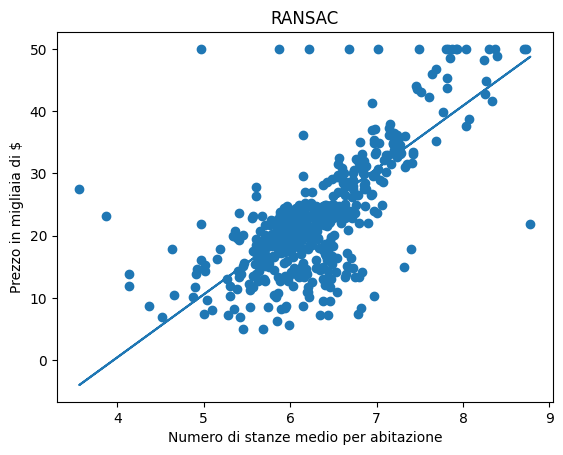

In [9]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_error', residual_threshold=5.0,random_state=0)
ransac.fit(X,y)
y_pred_ransac = ransac.predict(X)
lin_regplot(X,y,ransac)
plt.xlabel('Numero di stanze medio per abitazione')
plt.ylabel('Prezzo in migliaia di $')
plt.title('RANSAC')
plt.show()

In [10]:
import pickle
import os
dest = os.path.join('predictor','pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(slr,open(os.path.join(dest, 'lin_regressor.pkl'), 'wb'), protocol=4)
pickle.dump(ransac,open(os.path.join(dest, 'ransac_regressor.pkl'), 'wb'), protocol=4)

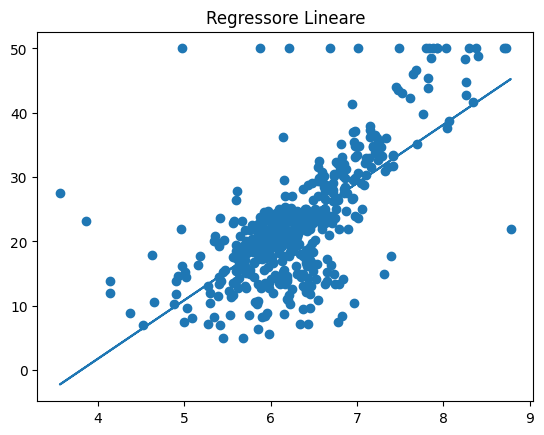

In [11]:
def save_regplot(X,y,model,titolo,percorso):
    plt.scatter(X,y)
    plt.plot(X,model.predict(X))
    plt.title(titolo)
    plt.savefig(percorso)
    return None

rlin = pickle.load(open(os.path.join('predictor', 'pkl_objects', 'lin_regressor.pkl'),'rb'))
save_regplot(X,y,rlin,"Regressore Lineare","static/linear.png")

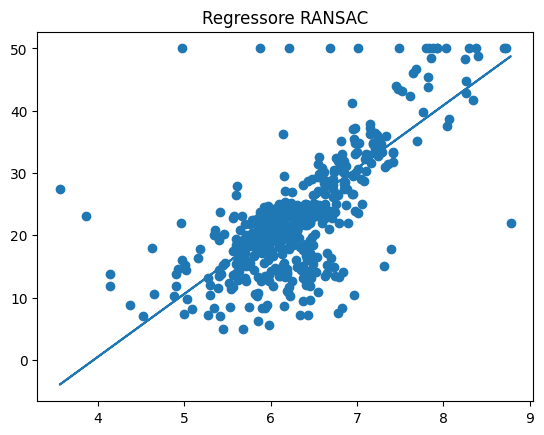

In [12]:
rlin = pickle.load(open(os.path.join('predictor', 'pkl_objects', 'ransac_regressor.pkl'),'rb'))
save_regplot(X,y,rlin,"Regressore RANSAC","static/ransac.png")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=df.iloc[:,:-1].values
y=df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
slrm=LinearRegression()
slrm.fit(X_train, y_train)
y_train_pred=slrm.predict(X_train)
y_test_pred=slrm.predict(X_test)
print('MSE train: %.3f, test: %.3f' %(mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 22.050, test: 23.980


In [14]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)))

R^2 train: 0.732, test: 0.733


In [15]:
dest = os.path.join('predictor','pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(slrm,open(os.path.join(dest, 'linmul_regressor.pkl'), 'wb'), protocol=4)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

regrq = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

X=df[['LSTAT']].values
y=df['MEDV'].values

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_quad = quadratic.fit_transform(X)
X_quad_fit = quadratic.fit_transform(X_fit)
regrq = regrq.fit(X_quad,y)
y_quad_fit = regrq.predict(quadratic.fit_transform(X_fit))



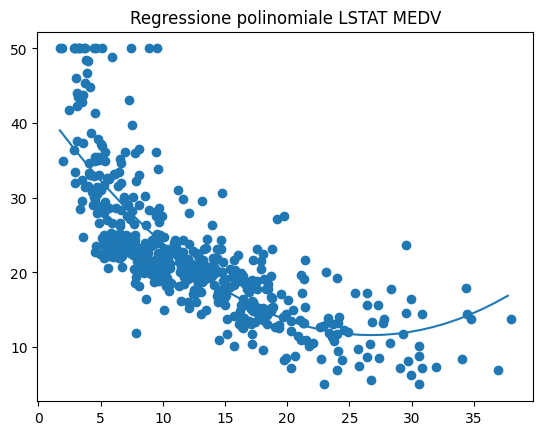

<Figure size 640x480 with 0 Axes>

In [28]:
plt.scatter(X,y)
plt.plot(X_fit, y_quad_fit)
plt.title("Regressione polinomiale LSTAT MEDV")
plt.show()
plt.savefig("static/quadratic.png")

In [29]:
pickle.dump(regrq,open(os.path.join(dest, 'quad_regressor.pkl'), 'wb'), protocol=4)